![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/3.SparkNLP_Pretrained_Models.ipynb)

# 3. Spark NLP Pretrained Models

Spark NLP offers the following pre-trained models in 26 languages and all you need to do is to load the pre-trained model into your disk by specifying the model name and then configuring the model parameters as per your use case and dataset. Then you will not need to worry about training a new model from scratch and will be able to enjoy the pre-trained SOTA algorithms directly applied to your own data with transform().

In the official documentation, you can find detailed information regarding how these models are trained by using which algorithms and datasets.

https://github.com/JohnSnowLabs/spark-nlp-models


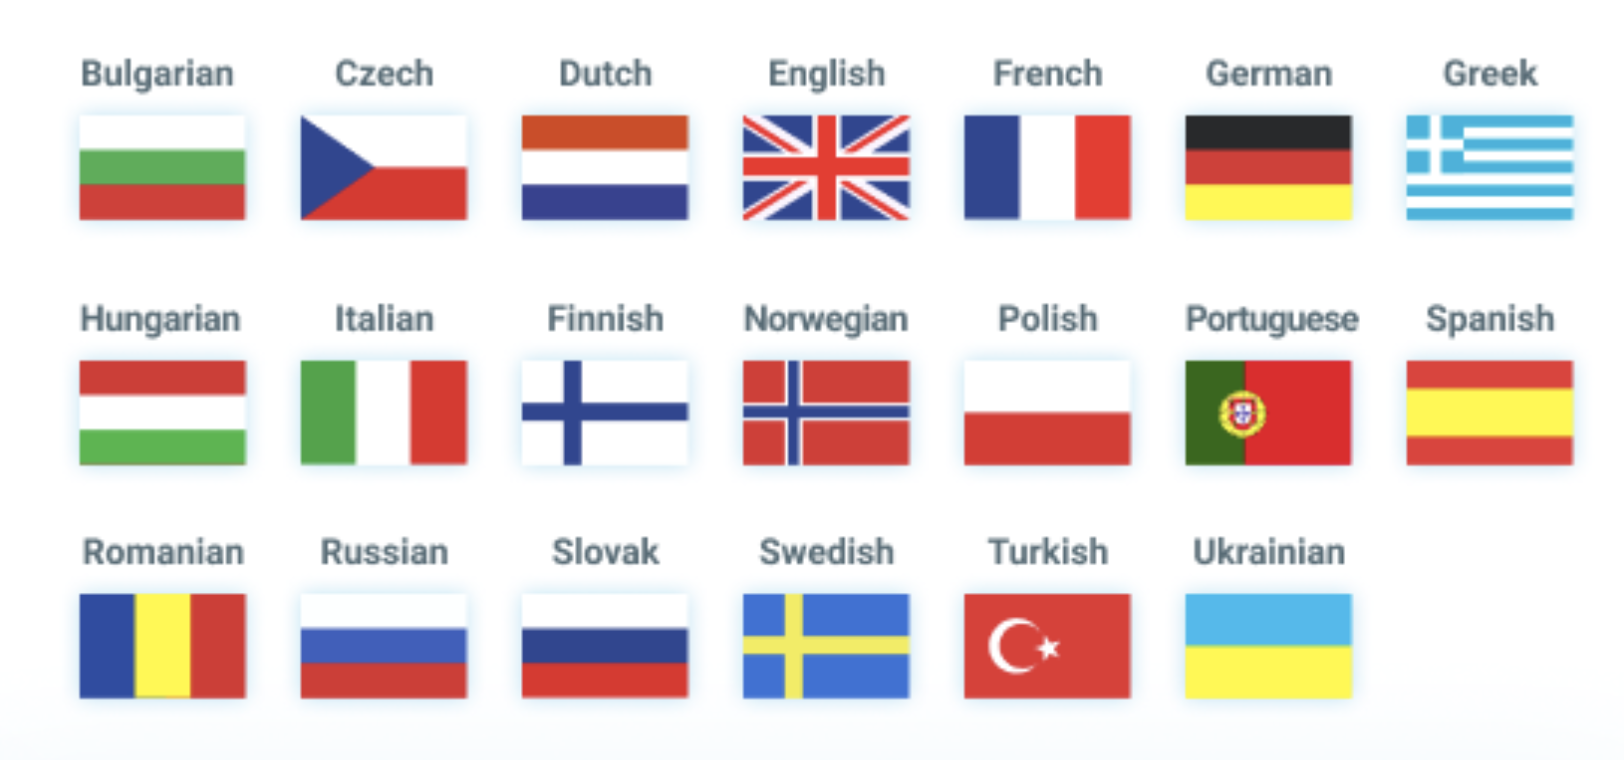

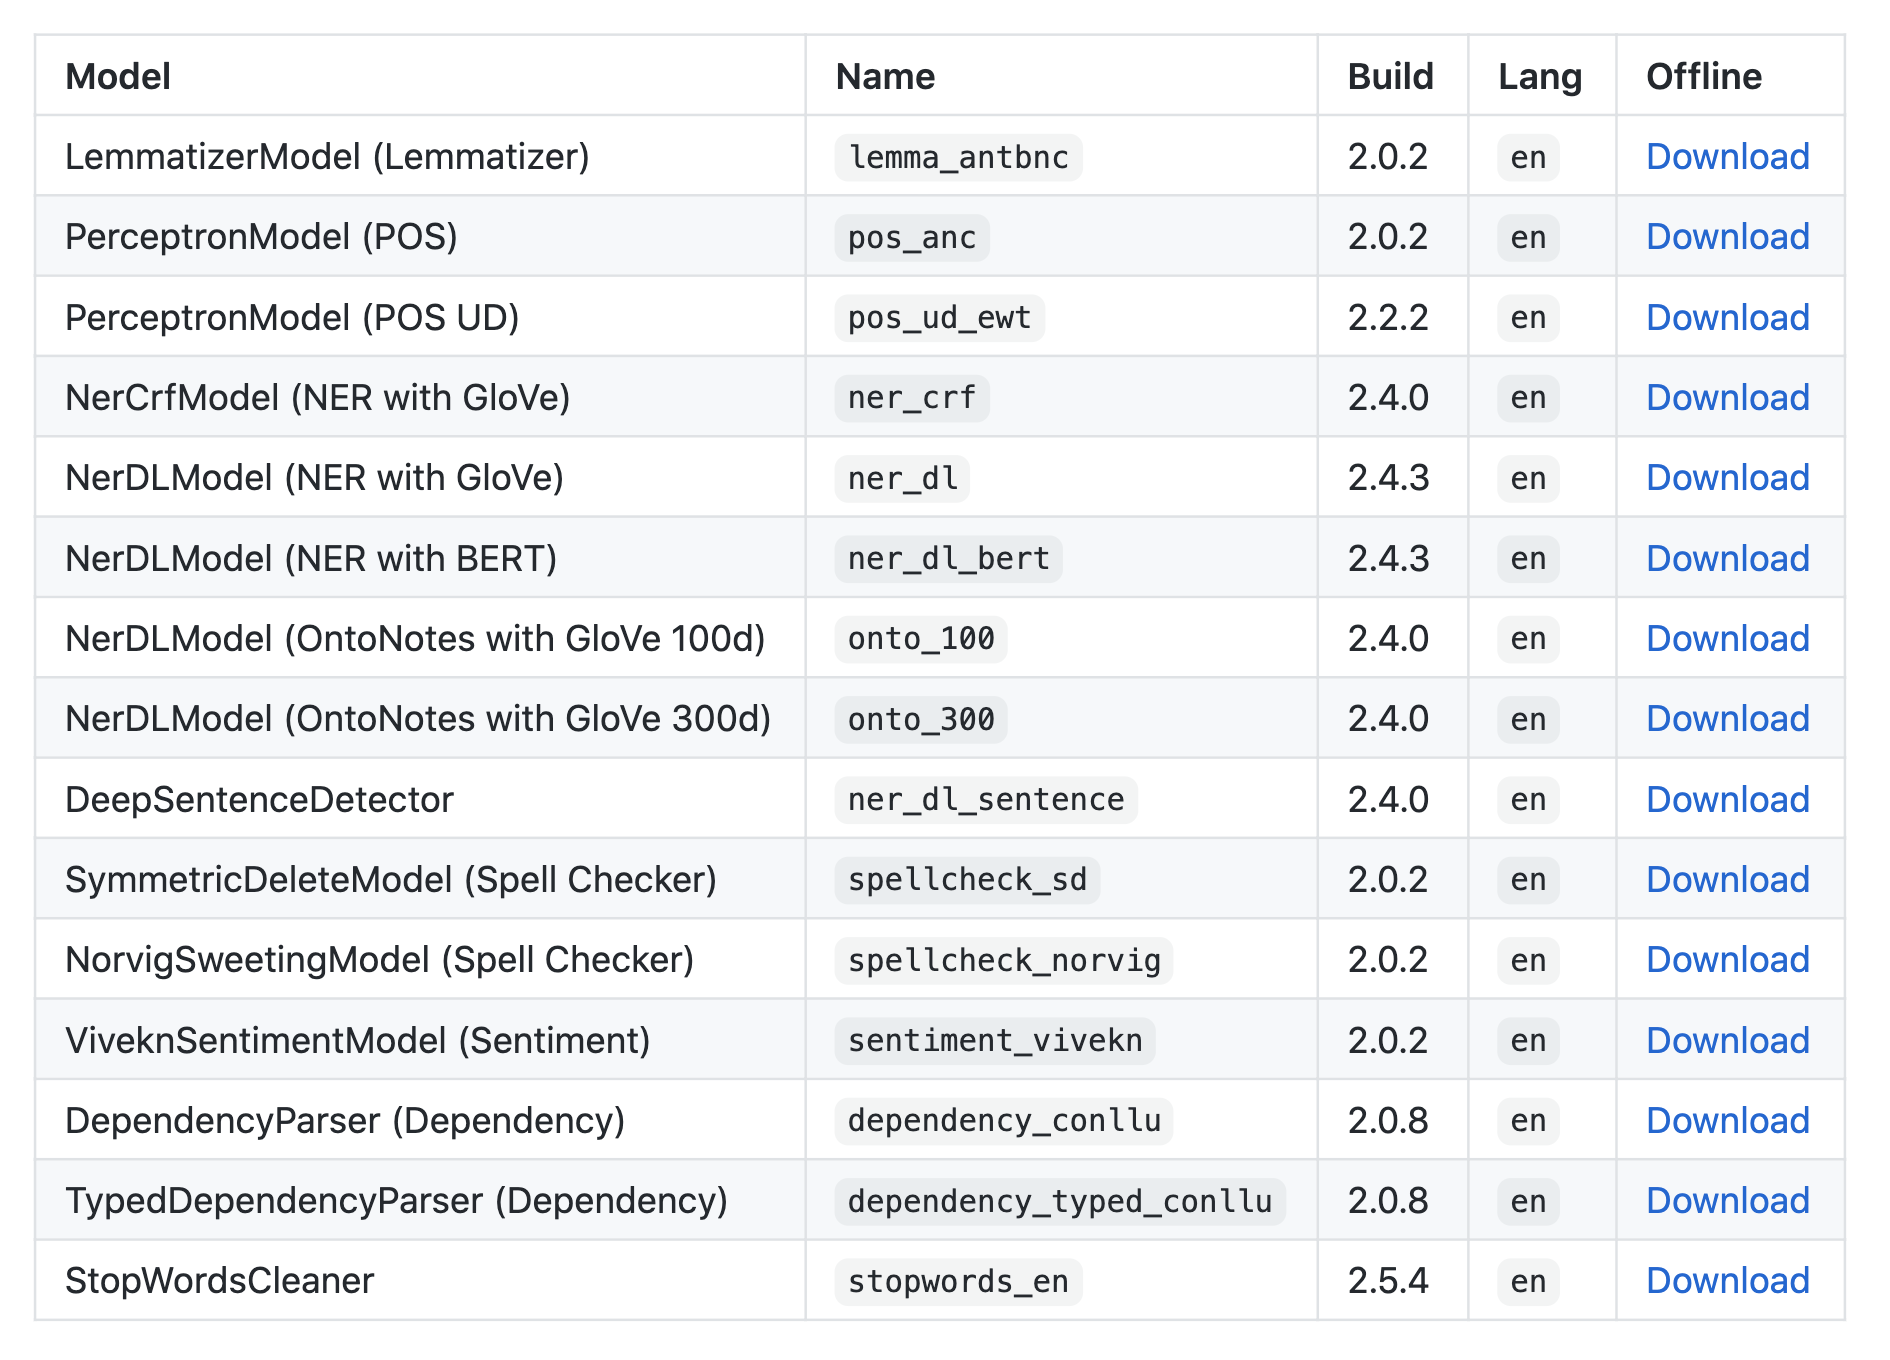


<b>  if you want to work with Spark 2.3 </b>
```
! pip install --upgrade pyspark==2.4.4

! pip install --ignore-installed -q spark-nlp==2.7.5

import sparknlp

spark = sparknlp.start(spark23=True)
```

In [ ]:
import sparknlp

spark = sparknlp.start()

from sparknlp.base import *
from sparknlp.annotator import *

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 3.1.0
Apache Spark version: 3.0.2


## LemmatizerModel

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
!wget -q -O news_category_test.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv

In [ ]:
import pyspark.sql.functions as F

news_df = spark.read\
                .option("header", "true")\
                .csv("news_category_test.csv")\
                .withColumnRenamed("description", "text")

news_df.show(truncate=50)

+--------+--------------------------------------------------+
|category|                                              text|
+--------+--------------------------------------------------+
|Business|Unions representing workers at Turner   Newall ...|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers...|
|Sci/Tech| A company founded by a chemistry researcher at...|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts ...|
|Sci/Tech| Southern California's smog fighting agency wen...|
|Sci/Tech|"The British Department for Education and Skill...|
|Sci/Tech|"confessed author of the Netsky and Sasser viru...|
|Sci/Tech|\\FOAF/LOAF  and bloom filters have a lot of in...|
|Sci/Tech|"Wiltshire Police warns about ""phishing"" afte...|
|Sci/Tech|In its first two years, the UK's dedicated card...|
|Sci/Tech| A group of technology companies  including Tex...|
|Sci/Tech| Apple Computer Inc.&lt;AAPL.O&gt; on  Tuesday ...|
|Sci/Tech| Free Record Shop, a Dutch music  retail chain,...|
|Sci/Tec

In [ ]:
lemmatizer = LemmatizerModel.pretrained('lemma_antbnc', 'en') \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \


'''
lemmatizer = Lemmatizer() \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \
    .setDictionary("./AntBNC_lemmas_ver_001.txt", value_delimiter ="\t", key_delimiter = "->")
'''

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


'\nlemmatizer = Lemmatizer()     .setInputCols(["token"])     .setOutputCol("lemma")     .setDictionary("./AntBNC_lemmas_ver_001.txt", value_delimiter ="\t", key_delimiter = "->")\n'

In [ ]:
!cd ~/cache_pretrained && ls -l


total 4
drwxr-xr-x 4 root root 4096 Jun  9 09:39 lemma_antbnc_en_2.0.2_2.4_1556480454569


In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stemmer = Stemmer() \
    .setInputCols(["token"]) \
    .setOutputCol("stem")

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    tokenizer,
    stemmer,
    lemmatizer
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)


In [ ]:
result = pipelineModel.transform(news_df)

result.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[[document, 0, 12...|[[token, 0, 5, Un...|[[token, 0, 5, un...|[[token, 0, 5, Un...|
|Sci/Tech| TORONTO, Canada ...|[[document, 0, 22...|[[token, 1, 7, TO...|[[token, 1, 7, to...|[[token, 1, 7, TO...|
|Sci/Tech| A company founde...|[[document, 0, 20...|[[token, 1, 1, A,...|[[token, 1, 1, a,...|[[token, 1, 1, A,...|
|Sci/Tech| It's barely dawn...|[[document, 0, 26...|[[token, 1, 4, It...|[[token, 1, 4, it...|[[token, 1, 4, It...|
|Sci/Tech| Southern Califor...|[[document, 0, 17...|[[token, 1, 8, So...|[[token, 1, 8, so...|[[token, 1, 8, So...|
+--------+--------------------+--------------------+--------------------

In [ ]:
result.select('token.result','lemma.result').show(5, truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Unions, representing, workers, at, Turner, Newall, say, they, are, ', disappointed, ', after, ta...|[Unions, represent, worker, at, Turner, Newall, say, they, be, ', disappointed, ', after, talk, w...|
|[TORONTO, ,, Canada, A, second, team, of, rocketeers, competing, for, the, #36;10, million, Ansar...|[TORONTO, ,, Canada, A, second, team, of, rocketeer, compete, for, the, #36;10, mi

## PerceptronModel (POS - Part of speech tags)

In [ ]:
import pandas as pd

pos_df= pd.read_html('https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html')

pos_df[0]

,0,1,2
0,Number,Tag,Description
1,1.,CC,Coordinating conjunction
2,2.,CD,Cardinal number
3,3.,DT,Determiner
4,4.,EX,Existential there
5,5.,FW,Foreign word
6,6.,IN,Preposition or subordinating conjunction
7,7.,JJ,Adjective
8,8.,JJR,"Adjective, comparative"
9,9.,JJS,"Adjective, superlative"


In [ ]:
pos = PerceptronModel.pretrained("pos_anc", 'en')\
          .setInputCols("document", "token")\
          .setOutputCol("pos")

pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]


In [ ]:
!cd ~/cache_pretrained && ls -l

total 8
drwxr-xr-x 4 root root 4096 Jun  9 09:39 lemma_antbnc_en_2.0.2_2.4_1556480454569
drwxr-xr-x 4 root root 4096 Jun  9 09:39 pos_anc_en_3.0.0_3.0_1614962126490


In [ ]:
nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    tokenizer,
    stemmer,
    lemmatizer,
    pos
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)


In [ ]:
result = pipelineModel.transform(news_df)

result.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|                 pos|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[[document, 0, 12...|[[token, 0, 5, Un...|[[token, 0, 5, un...|[[token, 0, 5, Un...|[[pos, 0, 5, NNP,...|
|Sci/Tech| TORONTO, Canada ...|[[document, 0, 22...|[[token, 1, 7, TO...|[[token, 1, 7, to...|[[token, 1, 7, TO...|[[pos, 1, 7, NNP,...|
|Sci/Tech| A company founde...|[[document, 0, 20...|[[token, 1, 1, A,...|[[token, 1, 1, a,...|[[token, 1, 1, A,...|[[pos, 1, 1, DT, ...|
|Sci/Tech| It's barely dawn...|[[document, 0, 26...|[[token, 1, 4, It...|[[token, 1, 4, it...|[[token, 1, 4, It...|[[pos, 1, 4, NNP,...|
|Sci/Tech| Southern Califor...|[[document

In [ ]:
result.select('token.result','pos.result').show(5, truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Unions, representing, workers, at, Turner, Newall, say, they, are, ', disappointed, ', after, ta...|    [NNP, VBG, NNS, IN, NNP, NNP, VBP, PRP, VBP, POS, JJ, POS, IN, NNS, IN, NN, NN, NN, NNP, NNP, .]|
|[TORONTO, ,, Canada, A, second, team, of, rocketeers, competing, for, the, #36;10, million, Ansar...|[NNP, ,, NNP, DT, JJ, NN, IN, NNS, VBG, IN, DT, NN, CD, NNP, NNP, NNP, ,, DT, NN, 

In [ ]:
# applying this pipeline to top 100 rows and then converting to Pandas

result = pipelineModel.transform(news_df.limit(100))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'token.begin', 'token.end', 'stem.result',  'lemma.result', 'pos.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("begin"),
        F.expr("cols['2']").alias("end"),
        F.expr("cols['3']").alias("stem"),
        F.expr("cols['4']").alias("lemma"),
        F.expr("cols['5']").alias("pos")).toPandas()

result_df.head(10) 

,token,begin,end,stem,lemma,pos
0,Unions,0,5,union,Unions,NNP
1,representing,7,18,repres,represent,VBG
2,workers,20,26,worker,worker,NNS
3,at,28,29,at,at,IN
4,Turner,31,36,turner,Turner,NNP
5,Newall,40,45,newal,Newall,NNP
6,say,47,49,sai,say,VBP
7,they,51,54,thei,they,PRP
8,are,56,58,ar,be,VBP
9,',60,60,',',POS


In [ ]:
# same in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('Unions representing workers at Turner   Newall say they are disappointed after talks with stricken parent firm Federal Mogul.')

list(zip(light_result['token'], light_result['stem'], light_result['lemma'], light_result['pos']))

[('Unions', 'union', 'Unions', 'NNP'),
 ('representing', 'repres', 'represent', 'VBG'),
 ('workers', 'worker', 'worker', 'NNS'),
 ('at', 'at', 'at', 'IN'),
 ('Turner', 'turner', 'Turner', 'NNP'),
 ('Newall', 'newal', 'Newall', 'NNP'),
 ('say', 'sai', 'say', 'VBP'),
 ('they', 'thei', 'they', 'PRP'),
 ('are', 'ar', 'be', 'VBP'),
 ('disappointed', 'disappoint', 'disappointed', 'VBN'),
 ('after', 'after', 'after', 'IN'),
 ('talks', 'talk', 'talk', 'NNS'),
 ('with', 'with', 'with', 'IN'),
 ('stricken', 'stricken', 'stricken', 'NN'),
 ('parent', 'parent', 'parent', 'NN'),
 ('firm', 'firm', 'firm', 'NN'),
 ('Federal', 'feder', 'Federal', 'NNP'),
 ('Mogul', 'mogul', 'Mogul', 'NNP'),
 ('.', '.', '.', '.')]

## Chunker

Meaningful phrase matching

This annotator matches a pattern of part-of-speech tags in order to return meaningful phrases from document

Output type: Chunk

Input types: Document, POS

Functions:

`setRegexParsers(patterns)`: A list of regex patterns to match chunks, for example: Array(“‹DT›?‹JJ›*‹NN›

`addRegexParser(patterns)`: adds a pattern to the current list of chunk patterns, for example: “‹DT›?‹JJ›*‹NN›”

In [ ]:
# applying POS chunker to find a custom pattern

chunker = Chunker()\
    .setInputCols(["document", "pos"])\
    .setOutputCol("chunk")\
    .setRegexParsers(["<NNP>+", "<DT>?<JJ>*<NN>"])

# NNP: Proper Noun
# NN: COmmon Noun
# DT: Determinator (e.g. the)
# JJ: Adjective

chunker.extractParamMap()

{Param(parent='Chunker_084a58011184', name='inputCols', doc='previous annotations columns, if renamed'): ['document',
  'pos'],
 Param(parent='Chunker_084a58011184', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='Chunker_084a58011184', name='outputCol', doc='output annotation column. can be left default.'): 'chunk',
 Param(parent='Chunker_084a58011184', name='regexParsers', doc='an array of grammar based chunk parsers'): ['<NNP>+',
  '<DT>?<JJ>*<NN>']}

In [ ]:
nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    tokenizer,
    stemmer,
    lemmatizer,
    pos,
    chunker
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df.limit(100))

result.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|                 pos|               chunk|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[[document, 0, 12...|[[token, 0, 5, Un...|[[token, 0, 5, un...|[[token, 0, 5, Un...|[[pos, 0, 5, NNP,...|[[chunk, 0, 5, Un...|
|Sci/Tech| TORONTO, Canada ...|[[document, 0, 22...|[[token, 1, 7, TO...|[[token, 1, 7, to...|[[token, 1, 7, TO...|[[pos, 1, 7, NNP,...|[[chunk, 1, 7, TO...|
|Sci/Tech| A company founde...|[[document, 0, 20...|[[token, 1, 1, A,...|[[token, 1, 1, a,...|[[token, 1, 1, A,...|[[pos, 1, 1, DT, ...|[[chunk, 52, 61, ...|
|Sci/Tech| It's barely dawn...|[[document, 0, 26...|

In [ ]:
result_df = result.select(F.explode(F.arrays_zip('chunk.result', 'chunk.begin',  'chunk.end')).alias("cols")) \
.select(F.expr("cols['0']").alias("chunk"),
        F.expr("cols['1']").alias("begin"),
        F.expr("cols['2']").alias("end")).toPandas()

result_df.head(10)

,chunk,begin,end
0,Unions,0,5
1,Turner Newall,31,45
2,Federal Mogul,113,125
3,stricken,92,99
4,parent,101,106
5,firm,108,111
6,TORONTO,1,7
7,Canada,10,15
8,Ansari X Prize,82,95
9,A second team,20,32


## Dependency Parser



In [ ]:
dep_parser = DependencyParserModel.pretrained('dependency_conllu')\
        .setInputCols(["document", "pos", "token"])\
        .setOutputCol("dependency")

dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


In [ ]:
typed_dep_parser = TypedDependencyParserModel.pretrained('dependency_typed_conllu')\
        .setInputCols(["token", "pos", "dependency"])\
        .setOutputCol("dependency_type")

dependency_typed_conllu download started this may take some time.
Approximate size to download 2.3 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
        documentAssembler, 
        tokenizer,
        stemmer,
        lemmatizer,
        pos,
        dep_parser,
        typed_dep_parser
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df.limit(100))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'token.begin',  'token.end', 'dependency.result', 'dependency_type.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("chunk"),
        F.expr("cols['1']").alias("begin"),
        F.expr("cols['2']").alias("end"),
        F.expr("cols['3']").alias("dependency"),
        F.expr("cols['4']").alias("dependency_type")).toPandas()

result_df.head(10)

,chunk,begin,end,dependency,dependency_type
0,Unions,0,5,ROOT,root
1,representing,7,18,workers,amod
2,workers,20,26,Unions,flat
3,at,28,29,Turner,case
4,Turner,31,36,workers,flat
5,Newall,40,45,say,nsubj
6,say,47,49,Unions,parataxis
7,they,51,54,disappointed,nsubj
8,are,56,58,disappointed,nsubj
9,',60,60,disappointed,case


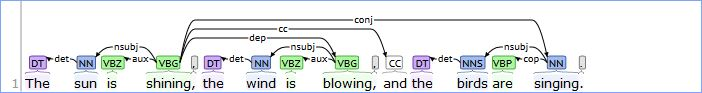

## StopWordsCleaner

`stopwords_fr`, `stopwords_de`, `stopwords_en`, `stopwords_it`, `stopwords_af` .... over 40 languages 

In [ ]:
stopwords_cleaner = StopWordsCleaner.pretrained('stopwords_en','en')\
        .setInputCols("token")\
        .setOutputCol("cleanTokens")\
        .setCaseSensitive(False)

stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]


In [ ]:
# we can also get the list of stopwords 

stopwords_cleaner_es = StopWordsCleaner.pretrained('stopwords_es','es')\
        .setInputCols("token")\
        .setOutputCol("cleanTokens")\
        .setCaseSensitive(False)

stopwords_cleaner_es.getStopWords()[:10]

stopwords_es download started this may take some time.
Approximate size to download 2.2 KB
[OK!]


['a',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'ahi',
 'ahí',
 'ahora',
 'al']

In [ ]:
token_assembler = TokenAssembler() \
    .setInputCols(["document", "cleanTokens"]) \
    .setOutputCol("clean_text")

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    tokenizer,
    stopwords_cleaner,
    token_assembler
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

# same in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('Peter Parker is a nice person and a friend of mine.')

light_result['clean_text']

['Peter Parker nice person friend mine.']

## SpellChecker


### Norvig Spell Checker

This annotator retrieves tokens and makes corrections automatically if not found in an English dictionary

In [ ]:
spell_checker_norvig = NorvigSweetingModel.pretrained('spellcheck_norvig')\
        .setInputCols("token")\
        .setOutputCol("corrected")

spellcheck_norvig download started this may take some time.
Approximate size to download 4.2 MB
[OK!]


In [ ]:
from pyspark.sql.types import StringType

text_list = ['Peter Parker is a nice persn and lives in New York.', 'Bruce Wayne is also a nice guy and lives in Gotham City.']

spark_df = spark.createDataFrame(text_list, StringType()).toDF("text")

spark_df.show(truncate=80)

+--------------------------------------------------------+
|                                                    text|
+--------------------------------------------------------+
|     Peter Parker is a nice persn and lives in New York.|
|Bruce Wayne is also a nice guy and lives in Gotham City.|
+--------------------------------------------------------+



In [ ]:
nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    tokenizer,
    stemmer,
    lemmatizer,
    pos,
    spell_checker_norvig
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(spark_df)

In [ ]:
from pyspark.sql import functions as F

result_df = result.select(F.explode(F.arrays_zip('token.result', 'corrected.result', 'stem.result',  'lemma.result', 'pos.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("corrected"),
        F.expr("cols['2']").alias("stem"),
        F.expr("cols['3']").alias("lemma"),
        F.expr("cols['4']").alias("pos")).toPandas()

result_df.head(10)

,token,corrected,stem,lemma,pos
0,Peter,Peter,peter,Peter,NNP
1,Parker,Parker,parker,Parker,NNP
2,is,is,i,be,VBZ
3,a,a,a,a,DT
4,nice,nice,nice,nice,JJ
5,persn,person,persn,persn,NN
6,and,and,and,and,CC
7,lives,lives,live,life,NNS
8,in,in,in,in,IN
9,New,New,new,New,NNP


In [ ]:
# same in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('The patint has pain and headace')

list(zip(light_result['token'], light_result['corrected']))

[('The', 'The'),
 ('patint', 'patient'),
 ('has', 'has'),
 ('pain', 'pain'),
 ('and', 'and'),
 ('headace', 'headache')]

### Context SpellChecker

The idea for this annotator is to have a flexible, configurable and "re-usable by parts" model.

Flexibility is the ability to accommodate different use cases for spell checking like OCR text, keyboard-input text, ASR text, and general spelling problems due to orthographic errors.

We say this is a configurable annotator, as you can adapt it yourself to different use cases avoiding re-training as much as possible.

Spell Checking at three levels: The final ranking of a correction sequence is affected by three things,

Different correction candidates for each word - **word level**.

The surrounding text of each word, i.e. it's context - **sentence level**.

The relative cost of different correction candidates according to the edit operations at the character level it requires - **subword level**.

In [ ]:
spellModel = ContextSpellCheckerModel.pretrained('spellcheck_dl')\
    .setInputCols("token")\
    .setOutputCol("checked")

finisher = Finisher()\
    .setInputCols("checked")

pipeline = Pipeline(
    stages = [
    documentAssembler,
    tokenizer,
    spellModel,
    finisher
  ])

empty_ds = spark.createDataFrame([[""]]).toDF("text")

sc_model = pipeline.fit(empty_ds)
lp = LightPipeline(sc_model)

spellcheck_dl download started this may take some time.
Approximate size to download 111.4 MB
[OK!]


In [ ]:
lp.annotate("Plaese alliow me tao introdduce myhelf, I am a man of waelth und tiaste")


{'checked': ['Please',
  'allow',
  'me',
  'to',
  'introduce',
  'myself',
  ',',
  'I',
  'am',
  'a',
  'man',
  'of',
  'wealth',
  'und',
  'taste']}

In [ ]:
examples = ['We will go to swimming if the ueather is sunny.',\
    "I have a black ueather jacket, so nice.",\
    "I introduce you to my sister, she is called ueather."]

spark_df = spark.createDataFrame(examples, StringType()).toDF("text")

results = sc_model.transform(spark_df)

results.show(truncate=False)


+----------------------------------------------------+-------------------------------------------------------------------+
|text                                                |finished_checked                                                   |
+----------------------------------------------------+-------------------------------------------------------------------+
|We will go to swimming if the ueather is sunny.     |[We, will, go, to, swimming, if, the, weather, is, sunny, .]       |
|I have a black ueather jacket, so nice.             |[I, have, a, black, leather, jacket, ,, so, nice, .]               |
|I introduce you to my sister, she is called ueather.|[I, introduce, you, to, my, sister, ,, she, is, called, Heather, .]|
+----------------------------------------------------+-------------------------------------------------------------------+



## Language Detector

Language detection and identification is the task of automatically detecting the language(s) present in a document based on the content of the document. `LanguageDetectorDL` is an annotator that detects the language of documents or sentences depending on the inputCols. In addition, LanguageDetetorDL can accurately detect language from documents with mixed languages by coalescing sentences and select the best candidate.

In [ ]:
LanguageDetectorDL().extractParamMap()

{Param(parent='LanguageDetectorDL_20c3f205dff0', name='coalesceSentences', doc='If sets to true the output of all sentences will be averaged to one output instead of one output per sentence. Default to false.'): True,
 Param(parent='LanguageDetectorDL_20c3f205dff0', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='LanguageDetectorDL_20c3f205dff0', name='threshold', doc='The minimum threshold for the final result otheriwse it will be either neutral or the value set in thresholdLabel.'): 0.5,
 Param(parent='LanguageDetectorDL_20c3f205dff0', name='thresholdLabel', doc='In case the score is less than threshold, what should be the label. Default is neutral.'): 'Unknown'}

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

languageDetector = LanguageDetectorDL.pretrained("ld_wiki_tatoeba_cnn_375", "xx")\
    .setInputCols("document")\
    .setOutputCol("language")\
    .setThreshold(0.5)\
    .setCoalesceSentences(True)

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    languageDetector
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)


ld_wiki_tatoeba_cnn_375 download started this may take some time.
Approximate size to download 8.8 MB
[OK!]


In [ ]:
light_model = LightPipeline(pipelineModel)


In [ ]:
text_en = "William Henry Gates III (born October 28, 1955) is an American business magnate, software developer, investor, and philanthropist. He is best known as the co-founder of Microsoft Corporation. During his career at Microsoft, Gates held the positions of chairman, chief executive officer (CEO), president and chief software architect, while also being the largest individual shareholder until May 2014."

text_de = 'Als Sebastian Thrun 2007 bei Google anfing, an selbstfahrenden Autos zu arbeiten, nahmen ihn nur wenige Leute außerhalb des Unternehmens ernst.'

text_es = "La historia del procesamiento del lenguaje natural generalmente comenzó en la década de 1950, aunque se puede encontrar trabajo de períodos anteriores. En 1950, Alan Turing publicó un artículo titulado 'Maquinaria de computación e inteligencia' que proponía lo que ahora se llama la prueba de Turing como criterio de inteligencia"

text_it = "Geoffrey Everest Hinton è uno psicologo cognitivo e uno scienziato informatico canadese inglese, noto soprattutto per il suo lavoro sulle reti neurali artificiali. Dal 2013 divide il suo tempo lavorando per Google e l'Università di Toronto. Nel 2017 è stato cofondatore ed è diventato Chief Scientific Advisor del Vector Institute di Toronto."

text_tr = 'Doğal Dil İşleme (NLP), bilgisayar biliminin, insanlar doğal olarak konuşup yazdıkça insan dilini anlamasını sağlayan bilgisayar biliminin alt alanıdır. '

In [ ]:
light_model.annotate(text_tr)['language']

['tr']

In [ ]:
light_model.fullAnnotate(text_es)[0]['language']

[Annotation(language, 0, 328, es, {'avk': '3.2227773E-25', 'toki': '0.0', 'dng': '0.0', 'hy': '0.0', 'bua': '0.0', 'pcd': '1.925592E-31', 'se': '3.0613952E-33', 'nlv': '0.0', 'ku': '1.6084451E-30', 'gcf': '0.0', 'xmf': '0.0', 'rue': '0.0', 'lou': '0.0', 'crh': '0.0', 'lkt': '0.0', 'oar': '0.0', 'aoz': '0.0', 'ss': '0.0', 'st': '0.0', 'ota': '0.0', 'bs': '7.278715E-36', 'cho': '0.0', 'stq': '0.0', 'kaa': '0.0', 'ba': '0.0', 'ngu': '0.0', 'pfl': '0.0', 'lb': '6.1421093E-24', 'hr': '3.8482914E-28', 'ta': '0.0', 'ka': '0.0', 'ar': '0.0', 'lzz': '0.0', 'swh': '0.0', 'hbo': '0.0', 'pi': '0.0', 'nov': '9.6963065E-25', 'yue': '0.0', 'ty': '0.0', 'fr': '2.2967522E-22', 'lfn': '5.509995E-9', 'is': '1.7047718E-29', 'urh': '0.0', 'mgm': '0.0', 'nah': '0.0', 'ug': '0.0', 'otk': '0.0', 'lv': '0.0', 'tmw': '0.0', 'eu': '1.03383036E-22', 'mdf': '0.0', 'got': '0.0', 'kl': '0.0', 'rn': '0.0', 'emx': '0.0', 'vep': '0.0', 'am': '0.0', 'hif': '0.0', 'mt': '4.717723E-21', 'krc': '0.0', 'bn': '0.0', 'rw': '0

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline("detect_language_220", lang = "xx")

pipeline.annotate("French author who helped pioneer the science-fiction genre.")

detect_language_220 download started this may take some time.
Approx size to download 9.1 MB
[OK!]


{'document': ['French author who helped pioneer the science-fiction genre.'],
 'language': ['en'],
 'sentence': ['French author who helped pioneer the science-fiction genre.']}

## Embeddings

### Word Embeddings (Glove)

In [ ]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
        .setInputCols(["document", "token"])\
        .setOutputCol("embeddings")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
        documentAssembler, 
        tokenizer,
        glove_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df.limit(10))

In [ ]:
result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("embeddings"))

result_df.show(10, truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                          embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.71865, 0.80754, -1.1787, 0.27145, -0.48833, -0.18938, -1.1789, 0.17836, -0.21995, -0.7216, -0....|
|representing|[0.25671, 0.30035, -0.18006, 0.46666, 0.98501, 0.2321, -0.34959, 0.26997, -0.99667, -0.43404, -0....|
|     workers|[0.50592, 0.71717, -0.67236, -0.32112, -0.58285, -0.47977, -0.50243, 0.60594, 0.25709, 0.03974, -...|
|          at|[0.1766, 0.093851, 0.24351, 0.44313, -0.39037, 0.12524, -0.19918, 0.59855, -0.82035, 0.28006, 0.5...|
|      Turner|[0.51634, -0.37186, -0.21776, -1.0115, 0.4014, -0.4841, 0.36274, -0.2952, -0.42258, -0.62844, 0.6...|
|      Newall|[-0.38857, -1.1449, -0.41737, -0.31969, -0.16546, -0.7044,

#### Using your own Word embeddings in Spark NLP

In [ ]:
! wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.nl.300.vec.gz

In [ ]:
!gunzip cc.nl.300.vec.gz

In [ ]:
custom_embeddings = WordEmbeddings()\
    .setInputCols(["document", "token"])\
    .setOutputCol("my_embeddings")\
    .setStoragePath('cc.nl.300.vec', "TEXT")\
    .setDimension(300)

custom_embeddings_model = custom_embeddings.fit(result.limit(10))# any df would be fine as long as it had document and token columns thru Spark NLP

In [ ]:
custom_embeddings_model.transform(result.limit(10)).select('my_embeddings.embeddings').show(truncate=100)

+----------------------------------------------------------------------------------------------------+
|                                                                                          embeddings|
+----------------------------------------------------------------------------------------------------+
|[[-0.0724, -0.0156, -0.031, -0.0285, 0.0037, 0.0091, -0.0524, -0.0528, -0.0572, -0.0975, 0.0156, ...|
|[[0.0123, -0.0048, -0.0016, 0.015, 0.0078, 0.0286, -0.0042, -0.0298, 0.0143, -0.1116, 0.0151, -0....|
|[[0.0807, 0.032, -0.0031, 0.0422, 0.14, 0.0321, -0.1067, -0.1257, -0.0627, -0.2708, -0.0688, 0.11...|
|[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...|
|[[-0.0471, 0.025, -0.007, 0.055, -0.019, 0.0615, -0.0303, -0.0282, -0.0087, -0.037, 0.0122, -0.02...|
|[[-0.2369, 0.1427, 0.0382, -0.0638, 0.0302, 0.0055, -0.0086, -0.0269, 0.0066, 0.1798, -0.0224, -0...|
|[[-0.2369, 0.1427, 0.0382, -0.0638, 0.0302, 0.0055, -0.0086, -0.0269, 0.

### Elmo Embeddings

Computes contextualized word representations using character-based word representations and bidirectional LSTMs.

It can work with 4 different pooling layer options: `word_emb`, 
`lstm_outputs1`, `lstm_outputs2`, or `elmo`

In [ ]:
elmo_embeddings = ElmoEmbeddings.pretrained('elmo')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")\
          .setPoolingLayer('elmo')# default --> elmo   

elmo download started this may take some time.
Approximate size to download 334.1 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          elmo_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("elmo_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                     elmo_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[-0.90887415, -0.30120426, 0.43796417, -0.57044435, 0.47783935, -0.119429074, 0.0076734107, 0.383...|
|representing|[0.13965544, 0.22222666, -0.039318062, 0.016958922, 0.7448401, 0.3416085, -0.3798288, -0.24866202...|
|     workers|[-0.46730578, -0.30479333, -0.026425809, -0.32429358, 0.75354207, -0.18502708, -0.12659112, -0.46...|
|          at|[-0.25518382, -0.22426175, -0.3707175, -0.60111916, 0.06384361, -0.48253918, 0.43195224, 0.506473...|
|      Turner|[-1.28543, -0.08228641, -0.191375, -0.42979646, -0.22902456, 0.11305181, 0.28118223, -0.6329747, ...|
|      Newall|[-0.15922381, -0.4069708, -0.26923794, -0.4310938, 0.02952

### Bert Embeddings

BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture

It can work with 3 different pooling layer options: `0`, 
`-1`, or `-2`

In [ ]:
bert_embeddings = BertEmbeddings.pretrained('bert_base_uncased')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

bert_base_uncased download started this may take some time.
Approximate size to download 392.5 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          bert_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("bert_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                     bert_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.6670657, 0.07569191, -0.4350654, 0.1306526, 0.44819456, -0.075209245, -0.22416598, 0.18378532,...|
|representing|[0.42402276, -0.15955907, -0.17578928, -0.5392352, -0.40183192, 0.3813794, 0.12605871, -0.4092866...|
|     workers|[0.7290724, 0.061318576, -0.5468209, -0.4750607, 0.33440354, 0.03293528, 0.3878469, 0.85204387, 0...|
|          at|[0.10098222, 0.40903702, -0.44306666, -0.17509177, 0.16822192, 0.11896088, 0.41752338, 0.2806585,...|
|      Turner|[0.6406129, 0.21072747, 0.0107047595, 0.06112945, 0.052615885, 0.48817554, 0.045349374, 0.3695609...|
|      Newall|[0.2347149, -0.4765903, -0.08398907, 0.05441785, 0.598168,

### Albert Embeddings

Computes contextualized word representations using “A Lite” implementation of BERT algorithm by applying parameter-reduction techniques



In [ ]:
albert_embeddings = AlbertEmbeddings.pretrained('albert_base_uncased')\
        .setInputCols(["document", "token"])\
        .setOutputCol("embeddings")

nlpPipeline = Pipeline(stages=[
        documentAssembler, 
        tokenizer,
        albert_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("albert_embeddings"))

result_df.show(truncate=100)

albert_base_uncased download started this may take some time.
Approximate size to download 42.7 MB
[OK!]
+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                   albert_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[-1.5542395, -1.1275098, 1.3612756, -1.2841787, 0.7699069, -0.34277856, -1.4335568, 0.050708294, ...|
|representing|[-1.0630223, -0.02741561, -1.7443993, -1.8499678, 1.0676899, -0.45256045, -0.6445014, 0.18104881,...|
|     workers|[-0.87667364, -0.10352721, 0.852217, -0.69292307, 1.3144948, 0.42113298, -1.6101073, -0.9135749, ...|
|          at|[-0.6902945, -0.0836775, -1.0358847, -1.5092213, 0.6704881, 0.41657215, 1.7814889, -0.73533744, 2...|
|      Turner|[-0.5421392, -1.2190892, 1.9623463, -0.49210003, 0.010382146, 0.76978

### DistilBert Embeddings

DistilBERT is a small, fast, cheap, and light Transformer model trained by distilling BERT base. It has 40% fewer parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances. This model has cased and uncased versions: it does make a difference between english and English. In this example you will see the cased one.

In [ ]:
distilbert_embeddings = DistilBertEmbeddings.pretrained("distilbert_base_cased") \
      .setInputCols("document", "token") \
      .setOutputCol("embeddings")

distilbert_base_cased download started this may take some time.
Approximate size to download 232.7 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          distilbert_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("distilBert_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                               distilBert_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.19041915, -0.33014572, -0.3617615, 0.18410982, -0.35511565, -0.029180985, -0.17958534, 0.16082...|
|representing|[0.014548134, -0.37673825, -0.6152947, 0.18999667, -0.24552128, -0.23285191, -0.1816722, 0.334211...|
|     workers|[0.3280528, -0.38786706, -0.12204235, 0.2373701, 0.13538423, -0.21947889, -0.18681559, 0.4766599,...|
|          at|[0.27058995, 0.23474456, -0.42629293, 0.2358712, 0.1452613, -0.44691956, 0.05108996, 0.31731695, ...|
|      Turner|[0.17559841, 0.034537084, -0.23360407, 0.1518214, -0.10217598, 0.098599195, 0.122149594, 0.326194...|
|      Newall|[0.071085855, -0.1515352, 0.661431, 0.30806237, -0.1962736

### RoBERTa Embeddings
This model randomly masks 15% of the words in the input then runs the entire masked sentence through the model and has to predict the masked words. It allows the model to learn a bidirectional representation of the sentence.

In [ ]:
roberta_embeddings = RoBertaEmbeddings.pretrained("roberta_base") \
      .setInputCols("document", "token") \
      .setOutputCol("embeddings")

roberta_base download started this may take some time.
Approximate size to download 284.8 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          roberta_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("RoBERTa_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                  RoBERTa_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[-0.09231165, -0.40577465, -0.31201354, -0.011348419, -0.15386946, 0.36902696, 0.17635551, -0.404...|
|representing|[0.010582972, -0.24025482, 0.046570007, 0.13478689, 0.34121066, 0.319114, 0.1599717, -0.07242809,...|
|     workers|[-0.10274119, -0.004794704, 0.065433785, -0.34332412, -0.07828417, 0.12740451, 0.020787023, 0.010...|
|          at|[-0.1840375, -0.18534414, -0.081598684, -0.17871732, 0.28569105, 0.030621395, -0.068979576, 0.101...|
|      Turner|[0.11480325, 0.0035227668, 0.020047437, -0.036259256, -0.3084185, -0.20472696, 0.0020393971, -0.1...|
|      Newall|[0.03823714, 0.10535201, -0.11821413, 0.008015752, -0.0020

### XlmRoBERTa Embeddings
This model is a scaled cross-lingual sentence encoder. It is trained on 2.5T of data across 100 languages data filtered from Common Crawl. XLM-R achieves state-of-the-arts results on multiple cross-lingual benchmarks.

In [ ]:
xlmroberta_embeddings = XlmRoBertaEmbeddings.pretrained("xlm_roberta_base") \
      .setInputCols("document", "token") \
      .setOutputCol("embeddings")

xlm_roberta_base download started this may take some time.
Approximate size to download 619.5 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          xlmroberta_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("XlmRoBERTa_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                               XlmRoBERTa_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[-0.06761156, 0.052124396, 0.010218479, -0.0013586698, 0.14159946, 0.16250204, -0.0016850786, 0.1...|
|representing|[-0.16157332, 0.048894975, -0.0033875322, -0.006176921, 0.094303384, 0.17808609, 9.782743E-4, 0.1...|
|     workers|[-0.11474927, 0.06834175, 0.0420876, 0.0131408945, 0.16677743, -0.15285648, 0.015667653, 0.294973...|
|          at|[-0.04537069, 0.028008863, 0.013073983, -0.036352485, 0.1604672, -0.024597798, 0.01568143, -0.165...|
|      Turner|[-0.057805248, 0.07893658, 0.0025042356, -0.01700496, 0.13637894, 0.14141706, 0.0085558435, 0.307...|
|      Newall|[-0.05159852, 0.0927762, 0.014961011, 0.006310774, 0.15383

### XlnetEmbeddings

Computes contextualized word representations using combination of Autoregressive Language Model and Permutation Language Model

In [ ]:
xlnet_embeddings = XlnetEmbeddings.pretrained('xlnet_base_cased')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          xlnet_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("xlnet_embeddings"))

result_df.show(truncate=100)

xlnet_base_cased download started this may take some time.
Approximate size to download 415.8 MB
[OK!]
+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                    xlnet_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[-0.11204408, -1.0880556, 1.0784769, -1.5509142, -0.8536419, 0.9307321, -1.385748, 0.43805543, 0....|
|representing|[-1.1859173, -0.84681106, 1.6014695, -0.8721896, 0.75299317, 0.46347722, 1.2401323, -0.81145316, ...|
|     workers|[0.040925335, -1.0951933, -1.7422701, 0.015327783, -1.0510299, -0.6733334, 1.2163575, -1.89115, 0...|
|          at|[0.18314256, 0.8931672, 0.5151215, 0.22869365, 1.1063789, -0.11106304, -0.40028387, -1.6873507, -...|
|      Turner|[-1.0777339, 0.053560242, 0.23795643, -0.6957464, -0.65435016, 0.869839

### Chunk Embeddings

This annotator utilizes `WordEmbeddings` or `BertEmbeddings` to generate chunk embeddings from either `TextMatcher`, `RegexMatcher`, `Chunker`, `NGramGenerator`, or `NerConverter` outputs.

`setPoolingStrategy`: Choose how you would like to aggregate Word Embeddings to Sentence Embeddings: `AVERAGE` or `SUM`

In [ ]:
news_df.take(3)

[Row(category='Business', text="Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."),
 Row(category='Sci/Tech', text=' TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for privately funded suborbital space flight, has officially announced the first launch date for its manned rocket.'),
 Row(category='Sci/Tech', text=' A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.')]

In [ ]:
entities = ['parent firm', 'economy', 'amino acids']
with open ('entities.txt', 'w') as f:
    for i in entities:
        f.write(i+'\n')

entity_extractor = TextMatcher() \
        .setInputCols(["document",'token'])\
        .setOutputCol("entities")\
        .setEntities("entities.txt")\
        .setCaseSensitive(False)\
        .setEntityValue('entities')

nlpPipeline = Pipeline(stages=[
        documentAssembler, 
        tokenizer,
        entity_extractor
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df.limit(10))

result.select('entities.result').take(3)

[Row(result=['parent firm']), Row(result=[]), Row(result=['amino acids'])]

In [ ]:
chunk_embeddings = ChunkEmbeddings() \
          .setInputCols(["entities", "embeddings"]) \
          .setOutputCol("chunk_embeddings") \
          .setPoolingStrategy("AVERAGE")

nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          entity_extractor,
          glove_embeddings,
          chunk_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('entities.result', 'chunk_embeddings.embeddings')).alias("cols")) \
                  .select(F.expr("cols['0']").alias("entities"),
                          F.expr("cols['1']").alias("chunk_embeddings"))

result_df.show(truncate=100)

+-----------+----------------------------------------------------------------------------------------------------+
|   entities|                                                                                    chunk_embeddings|
+-----------+----------------------------------------------------------------------------------------------------+
|parent firm|[0.45683652, -0.105479494, -0.34525, -0.143924, -0.192452, -0.33616, -0.22334, -0.208185, -0.3673...|
|amino acids|[-0.3861, 0.054408997, -0.287795, -0.33318, 0.375065, -0.185539, -0.330525, -0.214415, -0.73892, ...|
+-----------+----------------------------------------------------------------------------------------------------+



### UniversalSentenceEncoder

The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.

In [ ]:
# no need for token columns 
use_embeddings = UniversalSentenceEncoder.pretrained("tfhub_use", "en") \
      .setInputCols("document") \
      .setOutputCol("sentence_embeddings")

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
      documentAssembler, 
      use_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('document.result', 'sentence_embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("document"),
        F.expr("cols['1']").alias("USE_embeddings"))

result_df.show(truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                            document|                                                                                      USE_embeddings|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stric...|[0.012997539, 0.019844761, -0.024626467, 0.03975907, -0.044246465, 0.013197569, 0.07867439, -0.05...|
| TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansari X Prize,...|[0.0019999046, 0.051844068, -0.044029105, -5.9327687E-4, -0.038506, -0.027279453, 

## Loading Models from local

In [ ]:
!cd ~/cache_pretrained && pwd

In [ ]:
!cd ~/cache_pretrained && ls -l

In [ ]:
glove_embeddings = WordEmbeddingsModel.load('/root/cache_pretrained/glove_100d_en_2.4.0_2.4_1579690104032').\
    setInputCols(["document", 'token']).\
    setOutputCol("glove_embeddings")

## Getting Sentence Embeddings from word embeddings

In [ ]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
        .setInputCols(["document", "token"])\
        .setOutputCol("embeddings")

embeddingsSentence = SentenceEmbeddings() \
        .setInputCols(["document", "embeddings"]) \
        .setOutputCol("sentence_embeddings") \
        .setPoolingStrategy("AVERAGE") # or SUM


nlpPipeline = Pipeline(stages=[
        documentAssembler, 
        tokenizer,
        glove_embeddings,
        embeddingsSentence
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('document.result', 'sentence_embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("document"),
        F.expr("cols['1']").alias("sentence_embeddings"))

result_df.show(truncate=100)

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                            document|                                                                                 sentence_embeddings|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stric...|[0.06131713, 0.08552574, 0.1340617, -0.22403374, -0.23798925, -0.159222, -0.21079227, 0.07760903,...|
| TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansa

### Cosine similarity between two embeddings (sentence similarity)

In [ ]:
from scipy.spatial import distance

import numpy as np

v1 = result_df.select('sentence_embeddings').take(2)[0][0]

v2 = result_df.select('sentence_embeddings').take(2)[1][0]

1 - distance.cosine(np.array(v1), np.array(v2))

0.876465618347585

In [ ]:
v2 = result_df.select('sentence_embeddings').take(2)[0][0]

1 - distance.cosine(np.array(v1), np.array(v2))

1.0

## NERDL Model

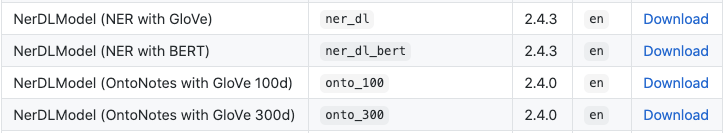

### Public NER (CoNLL 2003)

<p><strong>Named-Entity recognition</strong> is a well-known technique in information extraction it is also known as&nbsp;<strong>entity identification</strong>,&nbsp;<strong>entity chunking</strong>&nbsp;and&nbsp;<strong>entity extraction.</strong>&nbsp;Knowing the relevant tags for each article help in automatically categorizing the articles in defined hierarchies and enable smooth content discovery. 

Entities

``` PERSON, LOCATION, ORGANIZATION, MISC ```

In [ ]:
public_ner = NerDLModel.pretrained("ner_dl", 'en') \
            .setInputCols(["document", "token", "embeddings"]) \
            .setOutputCol("ner")

ner_dl download started this may take some time.
Approximate size to download 13.6 MB
[OK!]


In [ ]:
public_ner.extractParamMap()

{Param(parent='NerDLModel_d4424c9af5f4', name='batchSize', doc='Size of every batch'): 32,
 Param(parent='NerDLModel_d4424c9af5f4', name='classes', doc='get the tags used to trained this NerDLModel'): ['O',
  'B-ORG',
  'B-LOC',
  'B-PER',
  'I-PER',
  'I-ORG',
  'B-MISC',
  'I-LOC',
  'I-MISC'],
 Param(parent='NerDLModel_d4424c9af5f4', name='includeConfidence', doc='whether to include confidence scores in annotation metadata'): False,
 Param(parent='NerDLModel_d4424c9af5f4', name='inputCols', doc='previous annotations columns, if renamed'): ['document',
  'token',
  'embeddings'],
 Param(parent='NerDLModel_d4424c9af5f4', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='NerDLModel_d4424c9af5f4', name='outputCol', doc='output annotation column. can be left default.'): 'ner',
 Param(parent='NerDLModel_d4424c9af5f4', name='storageRef', doc='unique reference name for identification'): 'glove_100d'}

In [ ]:
public_ner.getClasses()

['O', 'B-ORG', 'B-LOC', 'B-PER', 'I-PER', 'I-ORG', 'B-MISC', 'I-LOC', 'I-MISC']

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# ner_dl model is trained with glove_100d. So we use the same embeddings in the pipeline
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d').\
    setInputCols(["document", 'token']).\
    setOutputCol("embeddings")

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    tokenizer,
    glove_embeddings,
    public_ner
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'ner.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)

+------------+---------+
|       token|ner_label|
+------------+---------+
|      Unions|        O|
|representing|        O|
|     workers|        O|
|          at|        O|
|      Turner|    B-ORG|
|      Newall|    I-ORG|
|         say|        O|
|        they|        O|
|         are|        O|
|           '|        O|
|disappointed|        O|
|           '|        O|
|       after|        O|
|       talks|        O|
|        with|        O|
|    stricken|        O|
|      parent|        O|
|        firm|        O|
|     Federal|    B-ORG|
|       Mogul|    I-ORG|
|           .|        O|
|     TORONTO|    B-LOC|
|           ,|        O|
|      Canada|    B-LOC|
|           A|        O|
|      second|        O|
|        team|        O|
|          of|        O|
|  rocketeers|        O|
|   competing|        O|
|         for|        O|
|         the|        O|
|      #36;10|        O|
|     million|        O|
|      Ansari|   B-MISC|
|           X|   I-MISC|
|       Prize|   I-MISC|


### NerDL OntoNotes 100D

This pipeline is based on&nbsp;<strong>NerDLApproach</strong> annotator with <strong>Char CNN - BiLSTM</strong> and <strong>GloVe Embeddings</strong> on the <strong>OntoNotes</strong> corpus and supports the identification of 18 entities.</p><p>Following NER types are supported in this pipeline:</p><table><thead><tr><th>Type</th><th>Description</th></tr></thead><tbody><tr><td><code>PERSON</code></td><td>People, including fictional.</td></tr><tr><td><code>NORP</code></td><td>Nationalities or religious or political groups.</td></tr><tr><td><code>FAC</code></td><td>Buildings, airports, highways, bridges, etc.</td></tr><tr><td><code>ORG</code></td><td>Companies, agencies, institutions, etc.</td></tr><tr><td><code>GPE</code></td><td>Countries, cities, states.</td></tr><tr><td><code>LOC</code></td><td>Non-GPE locations, mountain ranges, bodies of water.</td></tr><tr><td><code>PRODUCT</code></td><td>Objects, vehicles, foods, etc. (Not services.)</td></tr><tr><td><code>EVENT</code></td><td>Named hurricanes, battles, wars, sports events, etc.</td></tr><tr><td><code>WORK_OF_ART</code></td><td>Titles of books, songs, etc.</td></tr><tr><td><code>LAW</code></td><td>Named documents made into laws.</td></tr><tr><td><code>LANGUAGE</code></td><td>Any named language.</td></tr><tr><td><code>DATE</code></td><td>Absolute or relative dates or periods.</td></tr><tr><td><code>TIME</code></td><td>Times smaller than a day.</td></tr><tr><td><code>PERCENT</code></td><td>Percentage, including &rdquo;%&ldquo;.</td></tr><tr><td><code>MONEY</code></td><td>Monetary values, including unit.</td></tr><tr><td><code>QUANTITY</code></td><td>Measurements, as of weight or distance.</td></tr><tr><td><code>ORDINAL</code></td><td>&ldquo;first&rdquo;, &ldquo;second&rdquo;, etc.</td></tr><tr><td><code>CARDINAL</code></td><td>Numerals that do not fall under another type.</td></tr></tbody></table>

Entities

``` 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART' ```

In [ ]:
onto_ner = NerDLModel.pretrained("onto_100", 'en') \
          .setInputCols(["document", "token", "embeddings"]) \
          .setOutputCol("ner")

nlpPipeline = Pipeline(stages=[
          documentAssembler, 
          tokenizer,
          glove_embeddings,
          onto_ner
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)


onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]


In [ ]:
result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'ner.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)


+------------+-------------+
|       token|    ner_label|
+------------+-------------+
|      Unions|            O|
|representing|            O|
|     workers|            O|
|          at|            O|
|      Turner|        B-ORG|
|      Newall|        I-ORG|
|         say|            O|
|        they|            O|
|         are|            O|
|           '|            O|
|disappointed|            O|
|           '|            O|
|       after|            O|
|       talks|            O|
|        with|            O|
|    stricken|            O|
|      parent|            O|
|        firm|            O|
|     Federal|        B-ORG|
|       Mogul|        I-ORG|
|           .|            O|
|     TORONTO|        B-GPE|
|           ,|            O|
|      Canada|        B-GPE|
|           A|            O|
|      second|    B-ORDINAL|
|        team|            O|
|          of|            O|
|  rocketeers|            O|
|   competing|            O|
|         for|            O|
|         the|

### NER with Bert (CoNLL 2003)

In [ ]:
documentAssembler = DocumentAssembler()\
        .setInputCol("text")\
        .setOutputCol("document")

tokenizer = Tokenizer() \
        .setInputCols(["document"]) \
        .setOutputCol("token")

bert_embeddings = BertEmbeddings.pretrained('bert_base_cased')\
        .setInputCols(["document", "token"])\
        .setOutputCol("embeddings")

onto_ner_bert = NerDLModel.pretrained("ner_dl_bert", 'en') \
        .setInputCols(["document", "token", "embeddings"]) \
        .setOutputCol("ner")


nlpPipeline = Pipeline(stages=[
        documentAssembler, 
        tokenizer,
        bert_embeddings,
        onto_ner_bert
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

bert_base_cased download started this may take some time.
Approximate size to download 389.1 MB
[OK!]
ner_dl_bert download started this may take some time.
Approximate size to download 15.4 MB
[OK!]


In [ ]:
# fullAnnotate in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')

list(zip(light_result['token'], light_result['ner']))

[('Peter', 'I-PER'),
 ('Parker', 'I-PER'),
 ('is', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('persn', 'O'),
 ('and', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('New', 'I-LOC'),
 ('York', 'I-LOC'),
 ('.', 'O'),
 ('Bruce', 'I-PER'),
 ('Wayne', 'I-PER'),
 ('is', 'O'),
 ('also', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('guy', 'O'),
 ('and', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('Gotham', 'I-LOC'),
 ('City', 'I-LOC'),
 ('.', 'O')]

### Getting the NER chunks with NER Converter

In [ ]:
ner_converter = NerConverter() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    tokenizer,
    bert_embeddings,
    onto_ner_bert,
    ner_converter
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))


In [ ]:
result.select(F.explode(F.arrays_zip('ner_chunk.result', 'ner_chunk.metadata')).alias("cols")) \
.select(F.expr("cols['0']").alias("chunk"),
        F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-------------------------------------------+---------+
|chunk                                      |ner_label|
+-------------------------------------------+---------+
|Turner   Newall                            |ORG      |
|Federal Mogul                              |ORG      |
|TORONTO                                    |LOC      |
|Canada                                     |LOC      |
|Ansari X Prize                             |MISC     |
|University of Louisville                   |ORG      |
|Mike Fitzpatrick                           |PER      |
|Southern California's                      |LOC      |
|British Department for Education and Skills|ORG      |
|DfES                                       |ORG      |
|Netsky                                     |MISC     |
|Sasser                                     |MISC     |
|Sophos                                     |ORG      |
|Jaschan                                    |PER      |
|Germany                                    |LOC

In [ ]:
# fullAnnotate in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.fullAnnotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')


chunks = []
entities = []

for n in light_result[0]['ner_chunk']:
        
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    
    
import pandas as pd

df = pd.DataFrame({'chunks':chunks, 'entities':entities})

df

,chunks,entities
0,Peter Parker,PER
1,New York,LOC
2,Bruce Wayne,PER
3,Gotham City,LOC


## Highlight the entities

In [ ]:
%%capture

# Install spark-nlp-display
! pip install spark-nlp-display

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('recognize_entities_dl', lang='en')

recognize_entities_dl download started this may take some time.
Approx size to download 160.1 MB
[OK!]


In [ ]:
ann_text = pipeline.fullAnnotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')[0]
ann_text.keys()

dict_keys(['entities', 'document', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()
visualiser.display(ann_text, label_col='entities', document_col='document')

# Change color of an entity label
visualiser.set_label_colors({'LOC':'#008080', 'PER':'#800080'})
visualiser.display(ann_text, label_col='entities')

# Set label filter
visualiser.display(ann_text, label_col='entities', document_col='document',
                   labels=['PER'])

print ('\nColor code for label: \n"LOC": {}\n"PER": {}' .format(visualiser.get_label_color('LOC'),visualiser.get_label_color('PER')) )

Standard Output



Color code for label: 
"LOC": #008080
"PER": #800080


## Using Pretrained ClassifierDL and SentimentDL models

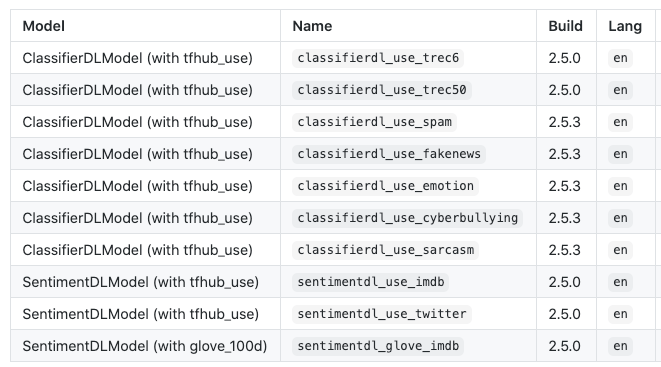

In [ ]:
fake_classifier = ClassifierDLModel.pretrained('classifierdl_use_fakenews', 'en') \
                .setInputCols(["document", "sentence_embeddings"]) \
                .setOutputCol("class")

classifierdl_use_fakenews download started this may take some time.
Approximate size to download 21.4 MB
[OK!]


fake_news classifier is trained on `https://raw.githubusercontent.com/joolsa/fake_real_news_dataset/master/fake_or_real_news.csv.zip`

In [ ]:
fake_classifier.getClasses()

['FAKE', 'REAL']

In [ ]:
documentAssembler = DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained(lang="en") \
      .setInputCols(["document"])\
      .setOutputCol("sentence_embeddings")

nlpPipeline = Pipeline(stages=[
      documentAssembler, 
      use,
      fake_classifier
  ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

fake_clf_model = nlpPipeline.fit(empty_data)


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/spam_ham_dataset.csv

In [ ]:
fake_lp_pipeline = LightPipeline(fake_clf_model)

text = 'BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump'

fake_lp_pipeline.annotate(text)

{'class': ['FAKE'],
 'document': ['BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump'],
 'sentence_embeddings': ['BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump']}

In [ ]:
sample_data = spark.createDataFrame([[text]]).toDF("text")

sample_data.show(truncate=False)

+-------------------------------------------------------------------------------------------------+
|text                                                                                             |
+-------------------------------------------------------------------------------------------------+
|BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump|
+-------------------------------------------------------------------------------------------------+



In [ ]:
pred = fake_clf_model.transform(sample_data)

pred.show()

+--------------------+--------------------+--------------------+--------------------+
|                text|            document| sentence_embeddings|               class|
+--------------------+--------------------+--------------------+--------------------+
|BREAKING: Leaked ...|[[document, 0, 96...|[[sentence_embedd...|[[category, 0, 96...|
+--------------------+--------------------+--------------------+--------------------+



In [ ]:
pred.select('text','class.result').show(truncate=False)

+-------------------------------------------------------------------------------------------------+------+
|text                                                                                             |result|
+-------------------------------------------------------------------------------------------------+------+
|BREAKING: Leaked Picture Of Obama Being Dragged Before A Judge In Handcuffs For Wiretapping Trump|[FAKE]|
+-------------------------------------------------------------------------------------------------+------+



you can find more samples here >> `https://github.com/KaiDMML/FakeNewsNet/tree/master/dataset`


## Generic classifier function

In [ ]:
def get_clf_lp(model_name, sentiment_dl=False, pretrained=True):

  documentAssembler = DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("document")

  use = UniversalSentenceEncoder.pretrained(lang="en") \
      .setInputCols(["document"])\
      .setOutputCol("sentence_embeddings")


  if pretrained:

    if sentiment_dl:

      document_classifier = SentimentDLModel.pretrained(model_name, 'en') \
                .setInputCols(["document", "sentence_embeddings"]) \
                .setOutputCol("class")
    else:
      document_classifier = ClassifierDLModel.pretrained(model_name, 'en') \
                .setInputCols(["document", "sentence_embeddings"]) \
                .setOutputCol("class")

  else:

    if sentiment_dl:

      document_classifier = SentimentDLModel.load(model_name) \
                .setInputCols(["document", "sentence_embeddings"]) \
                .setOutputCol("class")
    else:
      document_classifier = ClassifierDLModel.load(model_name) \
                .setInputCols(["document", "sentence_embeddings"]) \
                .setOutputCol("class")

  print ('classes:',document_classifier.getClasses())

  nlpPipeline = Pipeline(stages=[
      documentAssembler, 
      use,
      document_classifier
  ])

  empty_data = spark.createDataFrame([[""]]).toDF("text")

  clf_pipelineFit = nlpPipeline.fit(empty_data)

  clf_lp_pipeline = LightPipeline(clf_pipelineFit)

  return clf_lp_pipeline

In [ ]:
clf_lp_pipeline = get_clf_lp('classifierdl_use_trec50')

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_trec50 download started this may take some time.
Approximate size to download 21.2 MB
[OK!]
classes: [' ENTY_color', ' ENTY_techmeth', ' DESC_manner', ' NUM_volsize', ' ENTY_letter', ' NUM_temp', ' ENTY_body', ' NUM_count', ' ENTY_instru', ' NUM_period', ' NUM_speed', ' DESC_reason', ' ENTY_symbol', ' ENTY_event', ' HUM_desc', ' NUM_perc', ' ENTY_dismed', ' NUM_ord', ' HUM_gr', ' LOC_mount', ' ABBR_abb', ' DESC_desc', ' NUM_dist', ' HUM_title', ' ENTY_lang', ' ENTY_sport', ' ENTY_plant', ' NUM_code', ' NUM_other', ' ENTY_word', ' ENTY_animal', ' ENTY_substance', ' ENTY_veh', ' ENTY_product', ' LOC_state', ' ENTY_religion', ' ENTY_currency', ' NUM_date', ' LOC_country', ' ENTY_cremat', ' NUM_money', ' LOC_other', ' DESC_def', ' LOC_city', ' HUM_ind', ' ENTY_other', ' ENTY_termeq', ' ENTY_food', ' ABBR_exp', ' NUM_weight']


trained on the TREC datasets:

Classify open-domain, fact-based questions into one of the following broad semantic categories: 

```Abbreviation, Description, Entities, Human Beings, Locations or Numeric Values.```

In [ ]:
text = 'What was the number of member nations of the U.N. in 2000?'

clf_lp_pipeline.annotate(text)['class']

[' NUM_count']

In [ ]:
clf_lp_pipeline.fullAnnotate(text)[0]['class'][0].result

' NUM_count'

In [ ]:
clf_lp_pipeline.fullAnnotate(text)[0]['class'][0].metadata

{' ENTY_dismed': '3.768739E-22', ' ENTY_product': '2.4015744E-24', ' ENTY_techmeth': '1.5787039E-22', ' NUM_speed': '7.9484634E-23', ' NUM_volsize': '2.531511E-25', ' LOC_state': '6.378412E-25', ' NUM_code': '1.454945E-25', ' NUM_count': '0.9992601', ' ENTY_food': '1.3031208E-24', ' ENTY_animal': '1.6743833E-24', ' NUM_period': '6.8075115E-21', ' ENTY_religion': '5.9194734E-23', ' LOC_country': '5.306268E-21', ' LOC_mount': '3.2177816E-25', ' ENTY_termeq': '9.7900855E-26', ' ENTY_color': '1.1446835E-22', ' ENTY_lang': '6.3333907E-24', ' ENTY_sport': '8.0773835E-25', ' DESC_def': '2.4284432E-27', ' HUM_gr': '4.4863106E-21', ' ENTY_symbol': '4.1271923E-25', ' ENTY_currency': '8.156541E-29', ' ENTY_veh': '5.4147004E-22', ' LOC_other': '5.5141072E-11', ' ENTY_word': '5.3265024E-23', ' NUM_temp': '2.0907158E-23', ' NUM_dist': '1.2542656E-24', ' DESC_desc': '1.0926973E-12', ' DESC_manner': '9.258373E-23', ' NUM_ord': '2.2395288E-25', ' NUM_other': '3.977126E-27', ' DESC_reason': '1.1718965E-

In [ ]:
text = 'What animal was the first mammal successfully cloned from adult cells?'

clf_lp_pipeline.annotate(text)['class']

[' HUM_ind']

In [ ]:
clf_lp_pipeline = get_clf_lp('classifierdl_use_cyberbullying')


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_cyberbullying download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
classes: ['sexism', 'neutral', 'racism']


In [ ]:
text ='RT @EBeisner @ahall012 I agree with you!! I would rather brush my teeth with sandpaper then watch football with a girl!!'

clf_lp_pipeline.annotate(text)['class']

['sexism']

In [ ]:
clf_lp_pipeline = get_clf_lp('classifierdl_use_fakenews')


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_fakenews download started this may take some time.
Approximate size to download 21.4 MB
[OK!]
classes: ['FAKE', 'REAL']


In [ ]:
text ='Donald Trump a KGB Spy? 11/02/2016 In today’s video, Christopher Greene of AMTV reports Hillary Clinton campaign accusation that Donald Trump is a KGB spy is about as weak and baseless a claim as a Salem witch hunt or McCarthy era trial. It’s only because Hillary Clinton is losing that she is lobbing conspiracy theory. Citizen Quasar The way I see it, one of two things will happen: 1. Trump will win by a landslide but the election will be stolen via electronic voting, just like I have been predicting for over a decade, and the American People will accept the skewed election results just like they accept the TSA into their crotches. 2. Somebody will bust a cap in Hillary’s @$$ killing her and the election will be postponed. Follow AMTV!'

clf_lp_pipeline.annotate(text)['class']


['FAKE']

In [ ]:
text ='Sen. Marco Rubio (R-Fla.) is adding a veteran New Hampshire political operative to his team as he continues mulling a possible 2016 presidential bid, the latest sign that he is seriously preparing to launch a campaign later this year.Jim Merrill, who worked for former GOP presidential nominee Mitt Romney and ran his 2008 and 2012 New Hampshire primary campaigns, joined Rubio’s fledgling campaign on Monday, aides to the senator said.Merrill will be joining Rubio’s Reclaim America PAC to focus on Rubio’s New Hampshire and broader Northeast political operations."Marco has always been well received in New Hampshire, and should he run for president, he would be very competitive there," Terry Sullivan, who runs Reclaim America, said in a statement. "Jim certainly knows how to win in New Hampshire and in the Northeast, and will be a great addition to our team at Reclaim America.”News of Merrill’s hire was first reported by The New York Times.'

clf_lp_pipeline.annotate(text)['class']

['REAL']

In [ ]:
sentiment_lp_pipeline = get_clf_lp('sentimentdl_use_twitter', sentiment_dl=True)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[OK!]
classes: ['positive', 'negative']


In [ ]:
text ='I am SO happy the news came out in time for my birthday this weekend! My inner 7-year-old cannot WAIT!'

sentiment_lp_pipeline.annotate(text)['class']

['positive']

In [ ]:
sentiment_lp_pipeline = get_clf_lp('classifierdl_use_emotion', sentiment_dl=False)


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
classes: ['joy', 'fear', 'surprise', 'sadness']


In [ ]:
sentiment_lp_pipeline.annotate(text)['class']

['surprise']

.